In [2]:
import warnings
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

import re
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\lzh75\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\lzh75\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\lzh75\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\lzh75\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\lzh75\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

In [5]:
data = pd.read_csv("datasets/Clothing_Review.csv")
data.head(7)
print(data.shape)

# clean the data
data = data[data['Class Name'].isnull() == False]

(23486, 10)


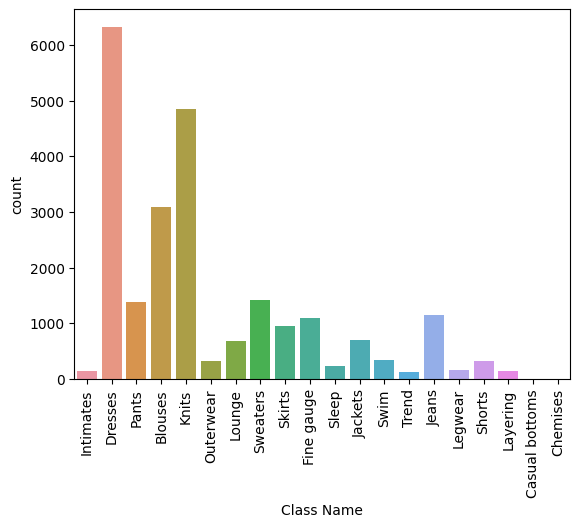

In [6]:
# count plot we automatically plot
# the unique count of the feature selected

sns.countplot(data=data, x='Class Name')
plt.xticks(rotation=90)
plt.show()

C:\Users\lzh75\AppData\Local\Temp\ipykernel_24932\2037961833.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


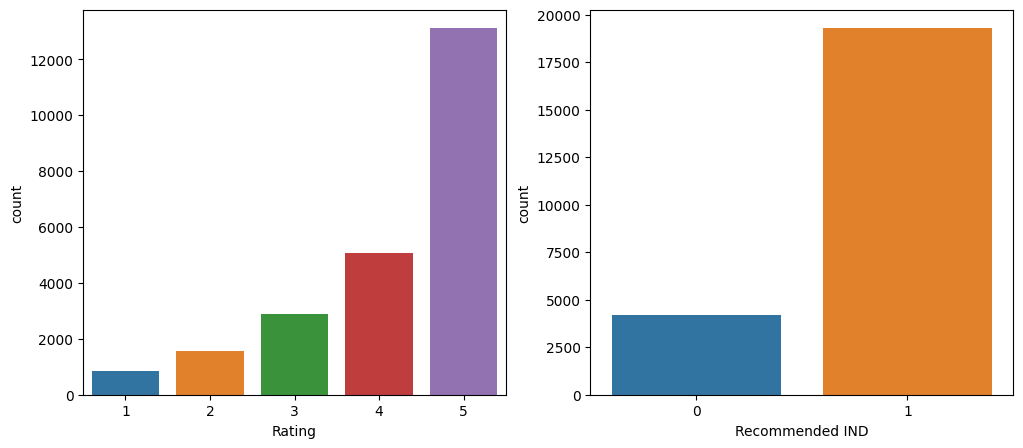

In [7]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Rating')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x="Recommended IND")
plt.show()

In [9]:
# histogram is amount of frequency
fig = px.histogram(data, marginal='box',
				x="Age", title="Age Group",
				color="Recommended IND",
				nbins=65-18,
				color_discrete_sequence=['green', 'red'])
fig.update_layout(bargap=0.2)
fig.show()

In [10]:
fig = px.histogram(data,
				x="Age",
				marginal='box',
				title="Age Group",
				color="Rating",
				nbins=65-18,
				color_discrete_sequence\
				=['black', 'green', 'blue', 'red', 'yellow'])
fig.update_layout(bargap=0.2)
fig.show()

In [12]:
def filter_score(rating):
    return int(rating > 3)

features = ['Class Name', 'Title', 'Review Text']

X = data[features]
y = data['Rating']
y = y.apply(filter_score)

In [13]:
def toLower(data):
	if isinstance(data, float):
		return '<UNK>'
	else:
		return data.lower()

stop_words = stopwords.words("english")

def remove_stopwords(text):
	no_stop = []
	for word in text.split(' '):
		if word not in stop_words:
			no_stop.append(word)
	return " ".join(no_stop)

def remove_punctuation_func(text):
	return re.sub(r'[^a-zA-Z0-9]', ' ', text)

# convert into lower case
X['Title'] = X['Title'].apply(toLower)
X['Review Text'] = X['Review Text'].apply(toLower)
# remove common words
X['Title'] = X['Title'].apply(remove_stopwords)
X['Review Text'] = X['Review Text'].apply(remove_stopwords)
# lemmatization
X['Title'] = X['Title'].apply(lambda x: lemm.lemmatize(x))
X['Review Text'] = X['Review Text'].apply(lambda x: lemm.lemmatize(x))
# remove punctuation
X['Title'] = X['Title'].apply(remove_punctuation_func)
X['Review Text'] = X['Review Text'].apply(remove_punctuation_func)

X['Text'] = list(X['Title']+X['Review Text']+X['Class Name'])

# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
	X['Text'], y, test_size=0.25, random_state=42)


C:\Users\lzh75\AppData\Local\Temp\ipykernel_24932\574357497.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lzh75\AppData\Local\Temp\ipykernel_24932\574357497.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lzh75\AppData\Local\Temp\ipykernel_24932\574357497.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [14]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)


In [15]:
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)

train_pad = pad_sequences(train_seq,
						maxlen=40,
						truncating="post",
						padding="post")
test_pad = pad_sequences(test_seq,
						maxlen=40,
						truncating="post",
						padding="post")


In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(10000, 128))
model.add(keras.layers.SimpleRNN(64, return_sequences=True))
model.add(keras.layers.SimpleRNN(64))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 64)          12352     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,309,057
Trainable params: 1,309,057
Non-

In [17]:
model.compile("rmsprop",
			"binary_crossentropy",
			metrics=["accuracy"])
history = model.fit(train_pad,
					y_train,
					epochs=5)


Epoch 1/5
551/551 [==============================] - 31s 42ms/step - loss: 0.4472 - accuracy: 0.8125
Epoch 2/5
551/551 [==============================] - 25s 45ms/step - loss: 0.3201 - accuracy: 0.8742
Epoch 3/5
551/551 [==============================] - 22s 40ms/step - loss: 0.2638 - accuracy: 0.8981
Epoch 4/5
551/551 [==============================] - 21s 38ms/step - loss: 0.2078 - accuracy: 0.9244
Epoch 5/5
551/551 [==============================] - 22s 40ms/step - loss: 0.1497 - accuracy: 0.9477
